<a href="https://colab.research.google.com/github/sravanthib2005/AIML-PROJECT-2320030200/blob/main/AIML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")


        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


bfs(graph, 'A')


A B C D E F 

In [3]:
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)


            for neighbor in reversed(graph[vertex]):
                if neighbor not in visited:
                    stack.append(neighbor)


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


dfs_iterative(graph, 'A')


A B D E F C 

In [6]:
def dls(graph, node, target, depth):
    """
    Depth-Limited Search (DLS): A helper function that performs DFS to a specific depth limit.
    """

    print(f"Visiting Node: {node} at Depth: {depth}")


    if node == target:
        return True


    if depth <= 0:
        return False


    for neighbor in graph[node]:
        if dls(graph, neighbor, target, depth - 1):
            return True

    return False

def iddfs(graph, start, target, max_depth):
    """
    Iterative Deepening DFS (IDDFS): Repeatedly applies DLS with increasing depth limits.
    """

    for depth in range(max_depth + 1):
        print(f"\n--- Depth Level: {depth} ---")
        if dls(graph, start, target, depth):
            print(f"\nTarget {target} found at depth {depth}!")
            return True

    print(f"\nTarget {target} not found within depth {max_depth}.")
    return False


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


iddfs(graph, 'A', 'F', 3)



--- Depth Level: 0 ---
Visiting Node: A at Depth: 0

--- Depth Level: 1 ---
Visiting Node: A at Depth: 1
Visiting Node: B at Depth: 0
Visiting Node: C at Depth: 0

--- Depth Level: 2 ---
Visiting Node: A at Depth: 2
Visiting Node: B at Depth: 1
Visiting Node: A at Depth: 0
Visiting Node: D at Depth: 0
Visiting Node: E at Depth: 0
Visiting Node: C at Depth: 1
Visiting Node: A at Depth: 0
Visiting Node: F at Depth: 0

Target F found at depth 2!


True

In [7]:
import random

def random_movement_2d(steps):

    x, y = 0, 0


    print(f"Starting at position: ({x}, {y})")


    directions = ['up', 'down', 'left', 'right']

    for step in range(steps):

        move = random.choice(directions)


        if move == 'up':
            y += 1
        elif move == 'down':
            y -= 1
        elif move == 'left':
            x -= 1
        elif move == 'right':
            x += 1


        print(f"Step {step + 1}: Moved {move}, New Position: ({x}, {y})")


    print(f"Final position: ({x}, {y})")


random_movement_2d(10)


Starting at position: (0, 0)
Step 1: Moved right, New Position: (1, 0)
Step 2: Moved right, New Position: (2, 0)
Step 3: Moved up, New Position: (2, 1)
Step 4: Moved up, New Position: (2, 2)
Step 5: Moved up, New Position: (2, 3)
Step 6: Moved right, New Position: (3, 3)
Step 7: Moved right, New Position: (4, 3)
Step 8: Moved left, New Position: (3, 3)
Step 9: Moved left, New Position: (2, 3)
Step 10: Moved left, New Position: (1, 3)
Final position: (1, 3)


In [9]:
import heapq


def astar(grid, start, goal):

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]


    open_list = []
    heapq.heappush(open_list, (0, start))


    g_cost = {start: 0}


    came_from = {start: None}


    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    while open_list:

        _, current = heapq.heappop(open_list)


        if current == goal:
            return reconstruct_path(came_from, current)


        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])


            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]):

                if grid[neighbor[0]][neighbor[1]] == 1:
                    continue


                tentative_g_cost = g_cost[current] + 1


                if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                    g_cost[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_cost, neighbor))
                    came_from[neighbor] = current

    return None


def reconstruct_path(came_from, current):
    path = []
    while current is not None:
        path.append(current)
        current = came_from[current]
    return path[::-1]  # Reverse the path


grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]


start = (0, 0)
goal = (4, 4)


path = astar(grid, start, goal)


if path:
    print("Path found:", path)
else:
    print("No path found.")


Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


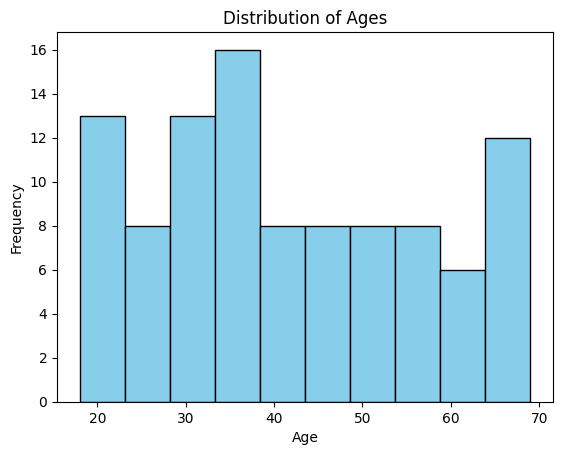

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Ages
ages = np.random.randint(18, 70, size=100)  # Generating random ages for example

# Create a histogram
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()


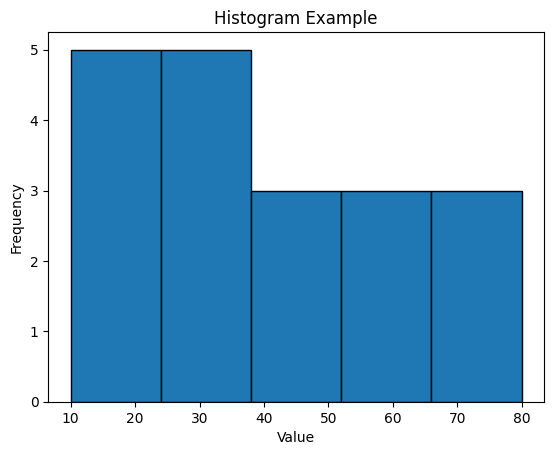

In [11]:
import matplotlib.pyplot as plt


data = [10, 15, 20, 22, 23, 24, 25, 30, 35, 37, 40, 45, 50, 55, 60, 65, 70, 75, 80]


plt.hist(data, bins=5, edgecolor='black')


plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()
